In [4]:
import matplotlib.pyplot as plt

/home/xcc/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [16]:
import numpy as np
from subprocess import call

In [77]:
def loadData(filename):
    intData = []
    for line in open(filename).readlines():
        intData.append(int(line))
    return intData

#filter out abnormal data
def preProcess(data):
    data = data[2:]
    avg = np.average(data)
    board = 2 * avg
    data = [x for x in data if x < board]
    return data

min: 92
average: 92.1548309662
variance: 1.21547526149


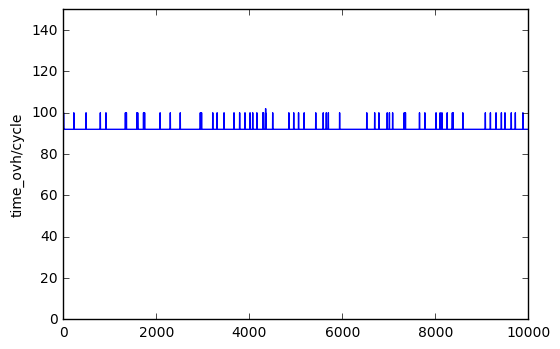

In [83]:
def analyzeOvh(testbin, loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    with open(resultfile, 'w') as outfile:
        call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'variance:', np.var(data)
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,150])
    plt.show()

def analyzeTimeOvh():
    analyzeOvh('time_ovh', 10000)
    
analyzeTimeOvh()

min: {0: 84, 1: 84, 2: 91, 3: 91, 4: 105, 5: 126, 6: 133, 7: 140, 8: 147, 9: 161, 10: 175, 11: 182, 12: 196, 13: 210, 14: 224, 15: 217, 16: 245, 17: 259, 18: 273, 19: 264, 20: 270, 21: 282, 22: 294, 23: 300, 24: 312, 25: 324, 26: 342, 27: 348, 28: 360, 29: 372, 30: 360, 31: 372, 32: 384, 33: 390, 34: 402, 35: 414, 36: 420, 37: 432, 38: 444, 39: 456, 40: 468, 41: 440, 42: 450, 43: 460, 44: 470, 45: 475, 46: 485, 47: 504, 48: 509, 49: 519, 50: 529, 51: 534, 52: 514, 53: 525, 54: 535, 55: 546, 56: 551, 57: 561, 58: 572, 59: 582, 60: 588, 61: 598, 62: 609, 63: 614, 64: 624, 65: 628, 66: 636, 67: 644, 68: 652, 69: 672, 70: 680, 71: 688, 72: 696, 73: 700, 74: 676, 75: 684, 76: 646, 77: 696, 78: 704, 79: 718, 80: 726, 81: 730, 82: 738, 83: 746, 84: 760, 85: 764, 86: 728, 87: 736, 88: 752, 89: 756, 90: 764, 91: 772, 92: 780, 93: 784, 94: 792, 95: 800, 96: 808, 97: 777, 98: 785, 99: 793}
average: {0: 87.109321864372873, 1: 85.875537768884442, 2: 91.002805049088366, 3: 96.15763645468202, 4: 111.

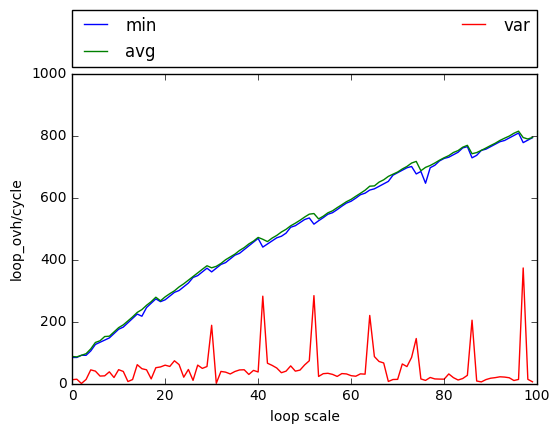

In [107]:
def analyzeLoopOvh(testbin = 'loop_ovh'):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    xlabel = 'loop scale'
    yrange = [0,1000]
    
    with open(resultfile, 'w') as outfile:
        call(['./' + testbin], stdout=outfile)
    
    data = {}
    for line in open(resultfile).readlines():
        nums = line.split(',')
        loopscale = int(nums[0])
        cycle = int(nums[1])
        if data.get(loopscale, []) == []:
            data[loopscale] = []
        data[loopscale].append(cycle)

    minOvh = {}
    avgOvh = {}
    varOvh = {}
    for loopscale, circles in data.iteritems():
        circles = preProcess(data[loopscale])
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = np.var(circles)
    print 'min:', minOvh
    print 'average:', avgOvh
    print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    plt.plot(varOvh.keys(), varOvh.values(), label='var')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
    
analyzeLoopOvh()